Student: Denny Boechat.

Course: Advanced Big Data and Data Mining (MSCS-634-B01).

Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering

In [2]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Standardize the dataset's features to ensure they are suitable for clustering

In [4]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create the scaler and fit_transform the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine.data)

# View the shape and a preview of the scaled data
X_scaled_df = pd.DataFrame(X_scaled, columns=wine.feature_names)
X_scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Apply Agglomerative Hierarchical Clustering to the dataset

In [5]:
# Import necessary module
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
# Let's assume we want to cluster into 3 groups (since there are 3 wine classes)
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(X_scaled)

# Add the cluster labels to the DataFrame for inspection
X_scaled_df['cluster'] = labels
X_scaled_df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


Visualize the clusters (using PCA for 2D plotting)

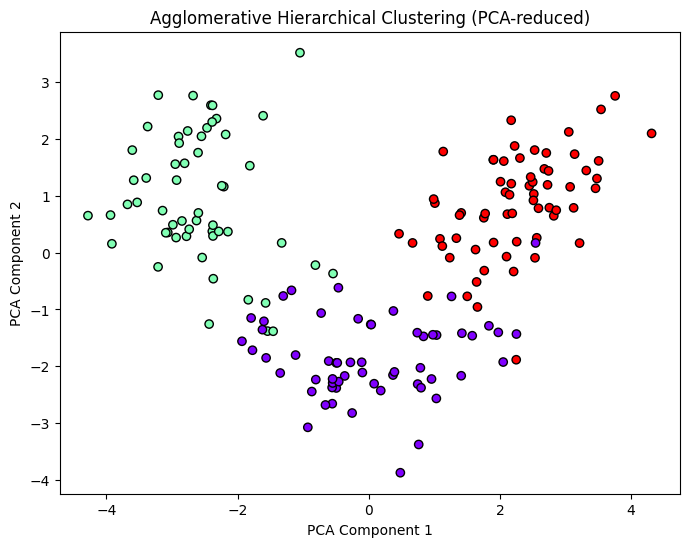

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title('Agglomerative Hierarchical Clustering (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Test different values for n_clusters and visualize using scatter plots

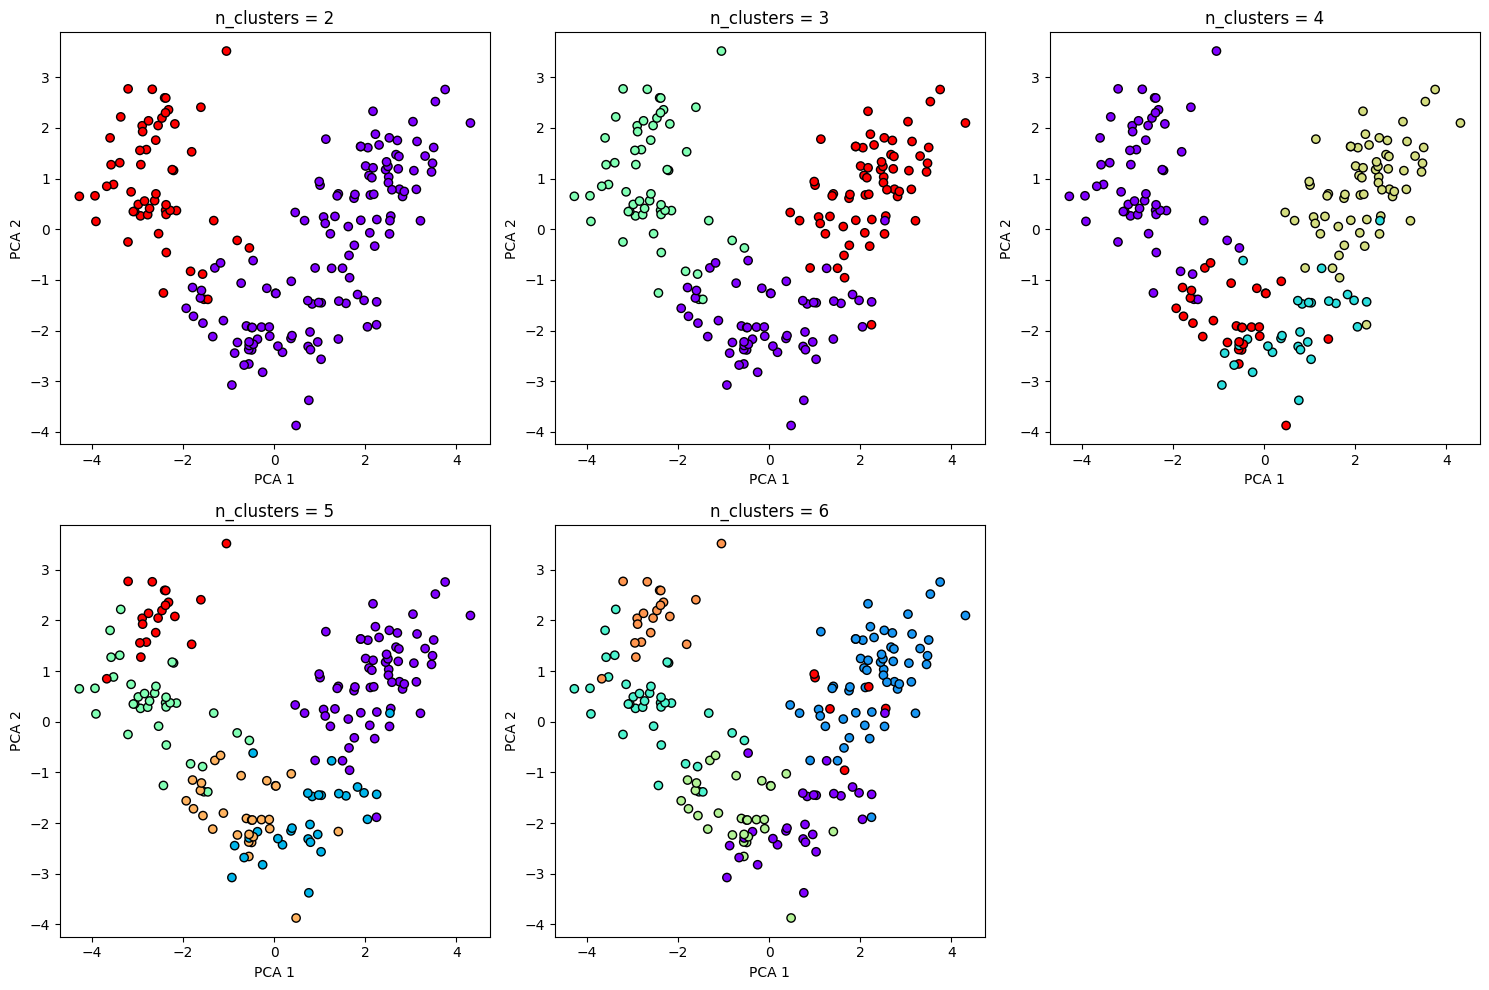

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Try different values of n_clusters
cluster_range = range(2, 7)

plt.figure(figsize=(15, 10))

for i, n in enumerate(cluster_range, 1):
    # Apply Agglomerative Clustering
    agg_cluster = AgglomerativeClustering(n_clusters=n)
    labels = agg_cluster.fit_predict(X_scaled)
    
    # Plot
    plt.subplot(2, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', edgecolor='k')
    plt.title(f'n_clusters = {n}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()


Generate a Dendrogram

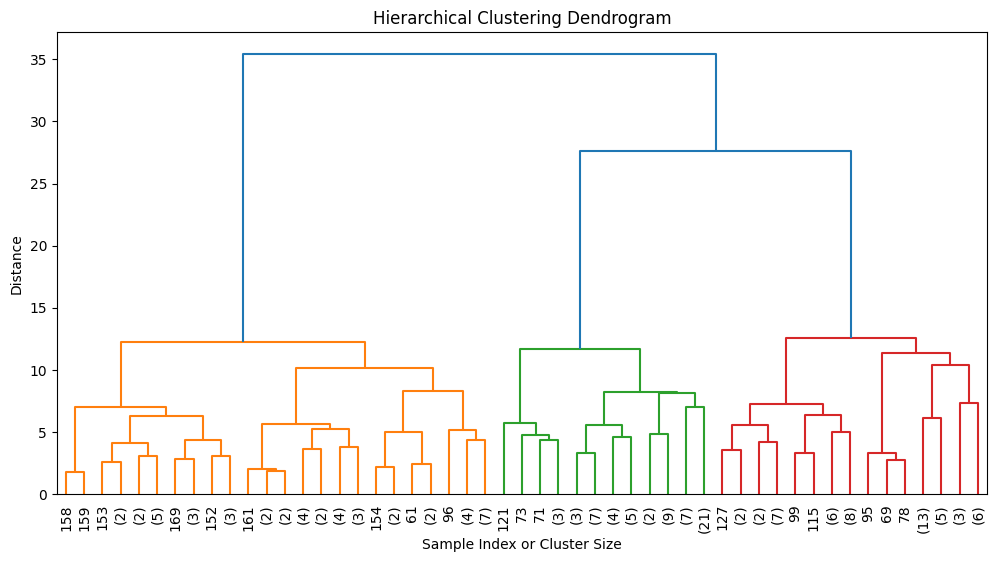

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Compute the linkage matrix
# 'ward' minimizes the variance within clusters (best for Euclidean distances)
linked = linkage(X_scaled, method='ward')

# Step 2: Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='level',  # show only the top levels
           p=5,                    # how many levels to show
           leaf_rotation=90,
           leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()


Apply the DBSCAN algorithm to the dataset.

In [9]:
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Create and fit the DBSCAN model
# eps and min_samples are key parameters to tune
dbscan = DBSCAN(eps=1.2, min_samples=5)  # You may adjust eps for better results
db_labels = dbscan.fit_predict(X_scaled)

# Step 2: Add DBSCAN labels to the DataFrame
X_scaled_df['dbscan_cluster'] = db_labels
X_scaled_df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster,dbscan_cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2,-1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2,-1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2,-1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2,-1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2,-1


Experiment with different values for eps and min_samples parameters to observe their effect on cluster formation. 
Display visualizations of the resulting clusters and highlight noise points

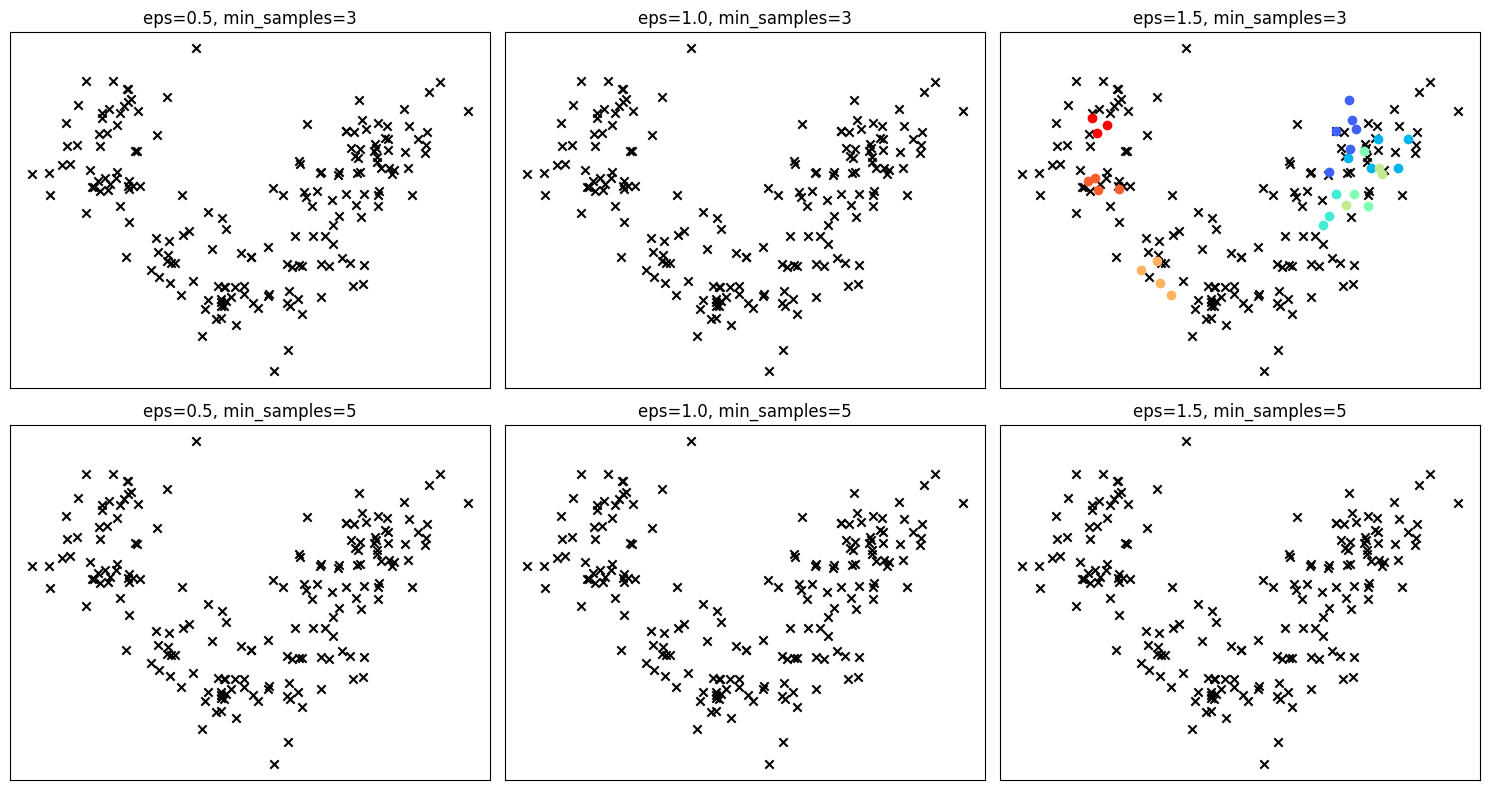

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: PCA for visualization
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Step 2: Define parameter grid to test
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [3, 5]

# Step 3: Plot results
fig, axes = plt.subplots(len(min_samples_values), len(eps_values), figsize=(15, 8))

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        # Plotting
        ax = axes[i, j]
        unique_labels = np.unique(labels)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

        for label, color in zip(unique_labels, colors):
            mask = labels == label
            if label == -1:
                # Noise points
                ax.scatter(X_pca[mask, 0], X_pca[mask, 1], c='black', marker='x', label='Noise')
            else:
                ax.scatter(X_pca[mask, 0], X_pca[mask, 1], c=[color], label=f'Cluster {label}')
        
        ax.set_title(f"eps={eps}, min_samples={min_samples}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()


Compute and report the following metrics to evaluate the clustering quality: 
- Silhouette Score 
- Homogeneity Score 
- Completeness Score 

In [12]:
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# DBSCAN must be fitted first (using your chosen eps and min_samples)
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Filter out noise points for silhouette (must have more than 1 cluster)
mask = db_labels != -1
if len(set(db_labels[mask])) > 1:
    sil_score = silhouette_score(X_scaled[mask], db_labels[mask])
else:
    sil_score = "Not applicable (only one cluster or all noise)"

# Use original wine dataset labels for homogeneity and completeness
true_labels = wine.target

# Only evaluate homogeneity/completeness if DBSCAN didn’t mark everything as noise
if len(set(db_labels)) > 1:
    homog_score = homogeneity_score(true_labels, db_labels)
    comp_score = completeness_score(true_labels, db_labels)
else:
    homog_score = "Not applicable (all noise)"
    comp_score = "Not applicable (all noise)"

# Report
print(f"Silhouette Score: {sil_score}")
print(f"Homogeneity Score: {homog_score}")
print(f"Completeness Score: {comp_score}")


Silhouette Score: Not applicable (only one cluster or all noise)
Homogeneity Score: Not applicable (all noise)
Completeness Score: Not applicable (all noise)


## Analysis and Insights 

When comparing Hierarchical Clustering and DBSCAN, the differences in performance become quite clear. For the Wine dataset, Hierarchical Clustering worked well because it produced clearly defined clusters that matched the true labels. It was easy to choose the number of clusters (since we know there are three wine types), and the algorithm performed fairly consistently. The evaluation metrics, like Silhouette Score and Homogeneity/Completeness, indicated that the clusters formed were well-separated and aligned with the true wine classes.

On the other hand, DBSCAN gave us some challenges at first. Initially, using eps=1.2 and min_samples=5, all points were labeled as noise (-1), meaning that DBSCAN couldn’t find any meaningful clusters. Even after adjusting the eps parameter, the clustering results were not as stable or clear as with hierarchical clustering. The key issue with DBSCAN is that it requires careful tuning of parameters, particularly eps and min_samples. Without setting these parameters correctly, DBSCAN can either fail to find any clusters or overfit the data, leading to incorrect groupings.

The choice of parameters plays a huge role in both algorithms, but especially in DBSCAN. In Hierarchical Clustering, the number of clusters (n_clusters) is typically predefined, making it easier to control. However, the number of clusters needs to be set correctly in advance, and this can sometimes be tricky if the true number of clusters isn’t known. In contrast, DBSCAN doesn’t require the number of clusters to be set, but it’s highly sensitive to the values of eps (the distance that defines a neighborhood) and min_samples (the minimum number of points needed to form a dense region). If these are set incorrectly, DBSCAN may label all points as noise or fail to identify proper clusters.

When it comes to strengths and weaknesses, each algorithm has its advantages. Hierarchical clustering is great when the clusters are well-separated and easy to define, as it doesn’t require assumptions about the data’s density or shape. It also gives us a visual representation of the clustering process through a dendrogram, which can help us understand how the clusters are formed. However, it does require choosing the number of clusters ahead of time, and it can be computationally expensive, especially for large datasets.

DBSCAN, on the other hand, shines when dealing with datasets that contain noise or when the clusters are of arbitrary shape. It doesn’t require us to specify the number of clusters beforehand, and it is particularly useful when we have outliers that we want to identify. However, its main weakness is the sensitivity to the eps and min_samples parameters, which can make tuning difficult. DBSCAN can also struggle when clusters vary in density, leading to poor results if the data isn't relatively uniform in terms of density.

In conclusion, for the Wine dataset, Hierarchical Clustering performed better because the data had well-separated, spherical clusters that were easy to define. DBSCAN, while powerful for other types of data (especially noisy or non-globular clusters), struggled here without careful tuning of parameters. For datasets with a known number of clusters and well-defined groupings, Hierarchical Clustering is often the better choice. However, if you're working with data that has outliers or complex cluster shapes, DBSCAN can be a very useful algorithm.